**Mengimpor library olah data dan model regresi**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

**Membaca Dataset**
**Dataset diambil dari kaggle yang berisi data energi listrik dan parameter angin **

In [ ]:
x = ('/content/drive/My Drive/Dataset/wind.csv')
wind_df=pd.read_csv(x)
wind_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


**Melakukan Exploitary Data Analysis untuk melihat isi data serta data cleaning**

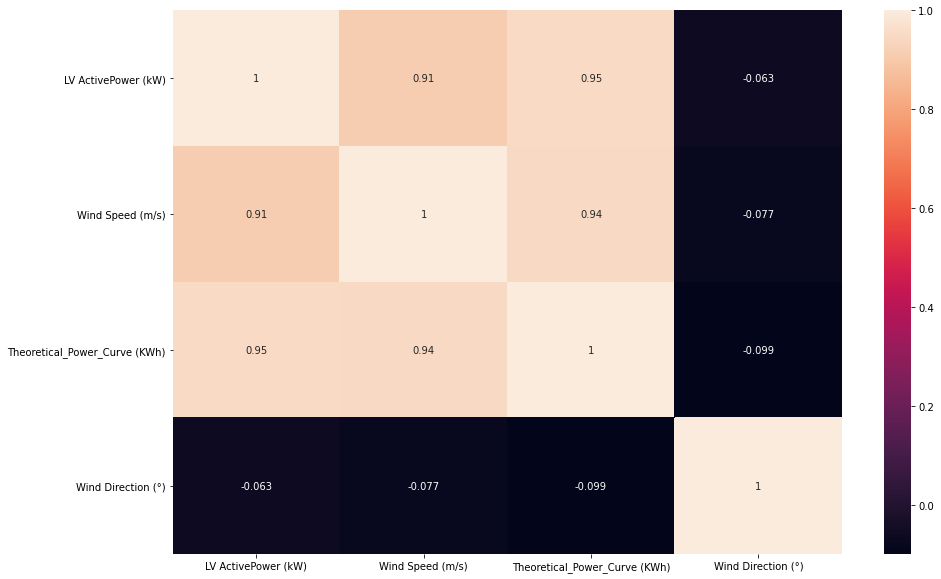

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(wind_df.corr(),annot=True)

In [ ]:
wind_df.shape

(50530, 5)

In [ ]:
wind_df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [ ]:
a = wind_df['LV ActivePower (kW)'];
b = wind_df['Wind Speed (m/s)']

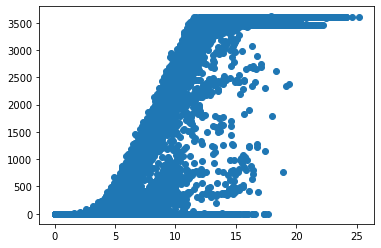

In [ ]:
plt.scatter(b,a)

**Memilih target prediksi (Active Power)**

In [ ]:
y = wind_df['LV ActivePower (kW)'].values
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

**Memilih Fitur (Predictor)**

In [ ]:
X = wind_df['Wind Speed (m/s)'].values.reshape(-1,1)
X

array([[5.31133604],
       [5.67216682],
       [5.2160368 ],
       ...,
       [8.43535805],
       [9.42136574],
       [9.97933197]])

**Membagi Data Menjadi Data Training dan Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 1)

**Memilih Model (Decision Tree Regressor)**
**Alasan pemilihan karena melihat distribusi data dari scatter plot** 

In [ ]:
model= DecisionTreeRegressor(random_state=1)

**Melakukan Training Data**

In [ ]:
model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
model.predict(X)

array([ 380.04779053,  453.76919556,  337.78131104, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [ ]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

**Menguji Akurasi Model**

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_hat = model.predict(X_test)
mean_absolute_error(y_test,y_hat)

224.89318316007956

**Melakukan perbandingan dengan model yang lain**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor(n_estimators=1000,random_state=1)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
y_hat = model.predict(X_test)
mean_absolute_error(y_test,y_hat)

224.89318316007956

**Hasilnya sama (model belum optimal, perlu dilakukan optimalisasi model lebih jauh dan teliti)**